 2.4.0 Evaluating hyperparameters - Random forests

### The following script contains the following:

#### 1. Import libraries, additional requirements
#### 2. Import data
#### 3. Load and split data in training/test sets
#### 4. Grid search cv
#### 5. Random search cv
#### 6. Create random forest classifier
#### 7. Conduct feature importances analysis
        
---------------------------------------------------------------------------------------------------------------------------
## 1. Import libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [6]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns
pd.set_option('display.max_columns', None)

---------------------------------------------------------------------------------------------------------------------------
## 2. Import data

In [10]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [14]:
X = pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'weather-cleaned-last-decade.csv'))
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                     8            0.89          1.0286   
1                     8            0.87          1.0318   
2                     5            0.81          1.0314   
3                     7            0.79          1.0262   
4                     5            0.90          1.0246   
...                 ...             ...             ...   
4013                  7            0.80          1.0262   
4014                  8            0.86          1.0226   
4015                  8            0.97          1.0232   
4016                  8            1.00          1.0242   
4017                  8            1.00          1.0251   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                       0.20                 0.03             0.0   
1                       0.25                 0.00             0.0   
2                       0.50                 0.00             3.7   
3                       0.63                 0.35             6.9   
4                       0.51                 0.07             3.7   
...                      ...                  ...             ...   
4013                    0.45                 0.00             2.0   
4014                    0.22                 0.08             0.0   
4015                    0.20                 0.00             0.0   
4016                    0.13                 0.00             0.0   
4017                    0.13                 0.00             0.0   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                 2.9             1.6             3.9                     7   
1                 3.6             2.7             4.8                     8   
2                 2.2             0.1             4.8                     5   
3                 3.9             0.5             7.5                     7   
4                 6.0             3.8             8.6                     7   
...               ...             ...             ...                   ...   
4013             -6.0           -10.8            -2.4                     8   
4014             -1.8            -3.8             0.3                     3   
4015              0.7            -0.1             2.0                     5   
4016              0.0            -0.4             0.6                     8   
4017              0.1            -0.5             0.9                     7   

      BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0                  0.88             1.0275                       0.24   
1                  0.85             1.0303                       0.25   
2                  0.84             1.0310                       0.50   
3                  0.94             1.0258                       0.35   
4                  0.95             1.0254                       0.30   
...                 ...                ...                        ...   
4013               0.89             1.0238                       0.24   
4014               0.77             1.0252                       0.59   
4015               0.91             1.0272                       0.69   
4016               0.91             1.0289                       0.24   
4017               0.90             1.0271                       0.24   

      BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                       0.00                0.0                -2.5   
1                       0.00                0.0                -1.2   
2                       0.00                1.4                -1.0   
3                       0.00                0.3                -1.3   
4                       0.00                0.1                -0.8   
...                      ...                ...                 ...   
4013                    0.16                0.0                -3.8   
4014                    0.00                2.6                -3.5   
401

In [16]:
y = pd.read_csv(os.path.join(path, '02 Data', 'Unsupervised', 'outcomes-cleaned-last-decade.csv'))
y

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
...                      ...                        ...   
4013                       0                          0   
4014                       0                          0   
4015                       0                          0   
4016                       0                          0   
4017                       0                          0   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
4013                          0                        0   
4014                          0                        0   
4015                          0                        0   
4016                          0                        0   
4017                          0                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
4013                            0                          0   
4014                            0                          0   
4015                            0                          0   
4016                            0                          0   
4017                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
...                       ...                         ...   
4013                        0                           0   
4014                        0                           0   
4015                        0                           0   
4016                        0                           0   
4017                        0                           0   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
4013                            0                        0   
4014                            0                        0   
4015                            0                        0   
4016                            0                        0   
4017                            0                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0        

---------------------------------------------------------------------------------------------------------------------------
## 3. Load and split data in training/test sets

In [19]:
# List of weather stations prefixes;
weather = [
    'BASEL_',
    'BELGRADE_',
    'BUDAPEST_',
    'DEBILT_',
    'DUSSELDORF_',
    'HEATHROW_',
    'KASSEL_',
    'LJUBLJANA_',
    'MAASTRICHT_',
    'MADRID_',
    'MUNCHENB_',
    'OSLO_',
    'SONNBLICK_',
    'STOCKHOLM_',
    'VALENTIA_'
]

In [21]:
# Dictionary mapping outcomes to weather stations for confusion matrix;
weather_outcomes = [
    'BASEL_pleasant_weather',
    'BELGRADE_pleasant_weather',
    'BUDAPEST_pleasant_weather',
    'DEBILT_pleasant_weather',
    'DUSSELDORF_pleasant_weather',
    'HEATHROW_pleasant_weather',
    'KASSEL_pleasant_weather',
    'LJUBLJANA_pleasant_weather',
    'MAASTRICHT_pleasant_weather',
    'MADRID_pleasant_weather',
    'MUNCHENB_pleasant_weather',
    'OSLO_pleasant_weather',
    'SONNBLICK_pleasant_weather',
    'STOCKHOLM_pleasant_weather',
    'VALENTIA_pleasant_weather'
]

In [23]:
# Load data, process it, and format it appropriately for training a machine learning model.

In [25]:
# Reshape df;
#X = decade.values.reshape(-1, 15, 9)

# Ensure the labels are in the same shape as X;
#y = outcomes.values.reshape(-1, 15)

def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [27]:
X.shape

(4018, 135)

In [29]:
y.shape

(4018, 15)

In [31]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3214, 135) (3214, 15)
(804, 135) (804, 15)


In [35]:
# Reshape X_train
#X_train = X_train.values.reshape(-1, 15) #-1 means "whatever works"
print(X_train.shape)
X_train

(3214, 135)


BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
3613                  6            0.77          1.0202   
2661                  0            0.53          1.0193   
3290                  5            0.72          1.0263   
1075                  7            0.83          1.0223   
3249                  6            0.74          1.0079   
...                 ...             ...             ...   
1130                  8            0.88          0.9978   
1294                  3            0.54          1.0219   
860                   3            0.67          1.0090   
3507                  8            0.89          1.0173   
3174                  3            0.68          1.0173   

      BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
3613                    0.12                 0.11             0.0   
2661                    2.59                 0.00            12.3   
3290                    0.50                 0.00             2.9   
1075                    0.40                 0.00             0.8   
3249                    0.47                 0.71             0.7   
...                      ...                  ...             ...   
1130                    0.37                 1.45             0.7   
1294                    3.25                 0.00            13.3   
860                     3.03                 0.00            11.6   
3507                    0.41                 3.35             0.1   
3174                    2.19                 0.00             9.7   

      BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
3613              8.9             5.0            12.7                     5   
2661             18.6            10.3            26.2                     0   
3290             -3.1            -6.2            -1.8                     5   
1075             -1.9            -2.6            -0.5                     8   
3249              0.8            -0.8             2.6                     2   
...               ...             ...             ...                   ...   
1130              0.4            -2.1             3.7                     7   
1294             21.9            14.0            28.4                     7   
860              15.2             9.2            22.2                     6   
3507             19.7            17.4            21.1                     3   
3174             18.7            10.5            26.5                     0   

      BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
3613               0.90             1.0221                       0.70   
2661               0.43             1.0207                       2.77   
3290               0.78             1.0269                       0.64   
1075               0.67             1.0330                       0.24   
3249               0.52             1.0073                       0.94   
...                 ...                ...                        ...   
1130               0.63             0.9930                       0.34   
1294               0.87             1.0173                       1.06   
860                0.55             1.0134                       2.21   
3507               0.77             1.0159                       2.69   
3174               0.52             1.0198                       2.48   

      BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
3613                    0.00                3.4                 6.9   
2661                    0.00               12.0                16.1   
3290                    0.00                3.1                -4.1   
1075                    0.00                0.0                -4.0   
3249                    0.00                6.8                 1.7   
...                      ...                ...                 ...   
1130                    1.08                0.0                 3.9   
1294                    0.50                0.7                20.6   
860

In [37]:
y_train

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
3613                       0                          0   
2661                       1                          1   
3290                       0                          0   
1075                       0                          0   
3249                       0                          0   
...                      ...                        ...   
1130                       0                          0   
1294                       1                          0   
860                        1                          0   
3507                       0                          1   
3174                       1                          1   

      BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
3613                          0                        0   
2661                          1                        1   
3290                          0                        0   
1075                          0                        0   
3249                          0                        0   
...                         ...                      ...   
1130                          0                        0   
1294                          0                        0   
860                           0                        0   
3507                          1                        1   
3174                          1                        0   

      DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
3613                            0                          0   
2661                            1                          1   
3290                            0                          0   
1075                            0                          0   
3249                            0                          0   
...                           ...                        ...   
1130                            0                          0   
1294                            1                          1   
860                             0                          0   
3507                            0                          1   
3174                            0                          0   

      KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
3613                        0                           0   
2661                        1                           1   
3290                        0                           0   
1075                        0                           0   
3249                        0                           0   
...                       ...                         ...   
1130                        0                           0   
1294                        1                           1   
860                         0                           1   
3507                        0                           1   
3174                        0                           1   

      MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
3613                            0                        0   
2661                            1                        0   
3290                            0                        0   
1075                            0                        0   
3249                            0                        0   
...                           ...                      ...   
1130                            0                        0   
1294                            1                        1   
860                             0                        0   
3507                            1                        1   
3174                            1                        0   

      MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
3613                          0                      0   
2661                          1                      1   
3290                          0                      0   
1075                          0                      0   
3249                          0        

In [39]:
#Use argmax to get rid of one-hot encoding and supply the numerical value.
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_train

(3214,)


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
#The X shape needs to be (804, -1);
X_test = X_test.values.reshape(804, -1) #-1 means "whatever works"
print(X_test.shape)
X_test

(804, 135)


array([[8.    , 0.92  , 1.0195, ..., 8.    , 1.0313, 0.79  ],
       [0.    , 0.48  , 1.0179, ..., 8.    , 1.0388, 0.62  ],
       [7.    , 0.84  , 1.0135, ..., 4.    , 1.0266, 0.39  ],
       ...,
       [8.    , 0.86  , 1.0013, ..., 8.    , 1.009 , 0.76  ],
       [5.    , 0.48  , 1.0186, ..., 1.    , 1.0364, 0.89  ],
       [5.    , 0.69  , 1.0231, ..., 8.    , 1.0369, 0.92  ]])

In [43]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

(804,)


array([ 0,  0,  2,  0,  9,  9,  0,  0,  9,  0,  0,  0,  0,  1,  2,  0,  1,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  9,
        0,  1,  0,  0,  5,  0,  0,  7,  1,  0,  0,  0,  1, 14,  6,  9,  1,
        0,  0,  0,  0,  1, 10,  1,  0,  0,  0,  0,  0,  9,  2,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  3,  0,  1,  9,  1,  9,  1,  0,  1,  0,
        0,  0,  0,  0,  9,  0,  9,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  1,  0,  1,  0,  0,  9,
        0,  9,  0,  1,  0,  0,  3,  0,  1,  0,  1,  0,  0,  0,  0,  0,  9,
        0,  5,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  0,  1,  0,
        9,  0,  0,  1,  0,  9,  0,  1,  0,  0,  0,  0,  0,  9,  0,  0,  0,
        0,  0,  1,  0,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  9,  9,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  5,
        1,  1,  1,  0,  0,  1,  0,  9,  0,  0,  0,  1,  9,  9,  6,  9,  0,
        0,  0,  0,  1,  0

---------------------------------------------------------------------------------------------------------------------------
## 4. GridsearchCV

In [46]:
# creating a RF classifier
clf = RandomForestClassifier()

In [48]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200], #add up to 500 estimators [300, 400, 500] took 21 min only 1% higher accuracy
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3] #add split of [4]
           }

In [50]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 1.7203451871871949 minutes


In [51]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.8574973521747008


---------------------------------------------------------------------------------------------------------------------------
## 5. RandomizedsearchCV

In [57]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [59]:
# Creating a RF classifier
clf2= RandomForestClassifier()

In [61]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.2725968917210895 minutes


In [62]:
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
Best RANDOM search score is: 0.8494069684258446


In [63]:
# Grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# Random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.8574973521747008
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}
Best RANDOM search score is: 0.8494069684258446


- **notes:** Relatively similar but lower score than our original hyperparameters, we can adjust the grid and randomized search hyperparameters in order to possibly score a higher accuracy than the original CNN model 'clf = RandomForestClassifier'

---------------------------------------------------------------------------------------------------------------------------
## 6. Create random forest classifier

In [67]:
# Creating a RF classifier with the best results from above
#clf = RandomForestClassifier(n_estimators = 100) #original hyperparameters at 88%
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3)


# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=7, min_samples_split=3, n_estimators=200)

In [68]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.8519900497512438


- **Notes:** As predicted, a relatively similar but lower prediction accuracy of approx. 85% rather than the original accuracy of 88%

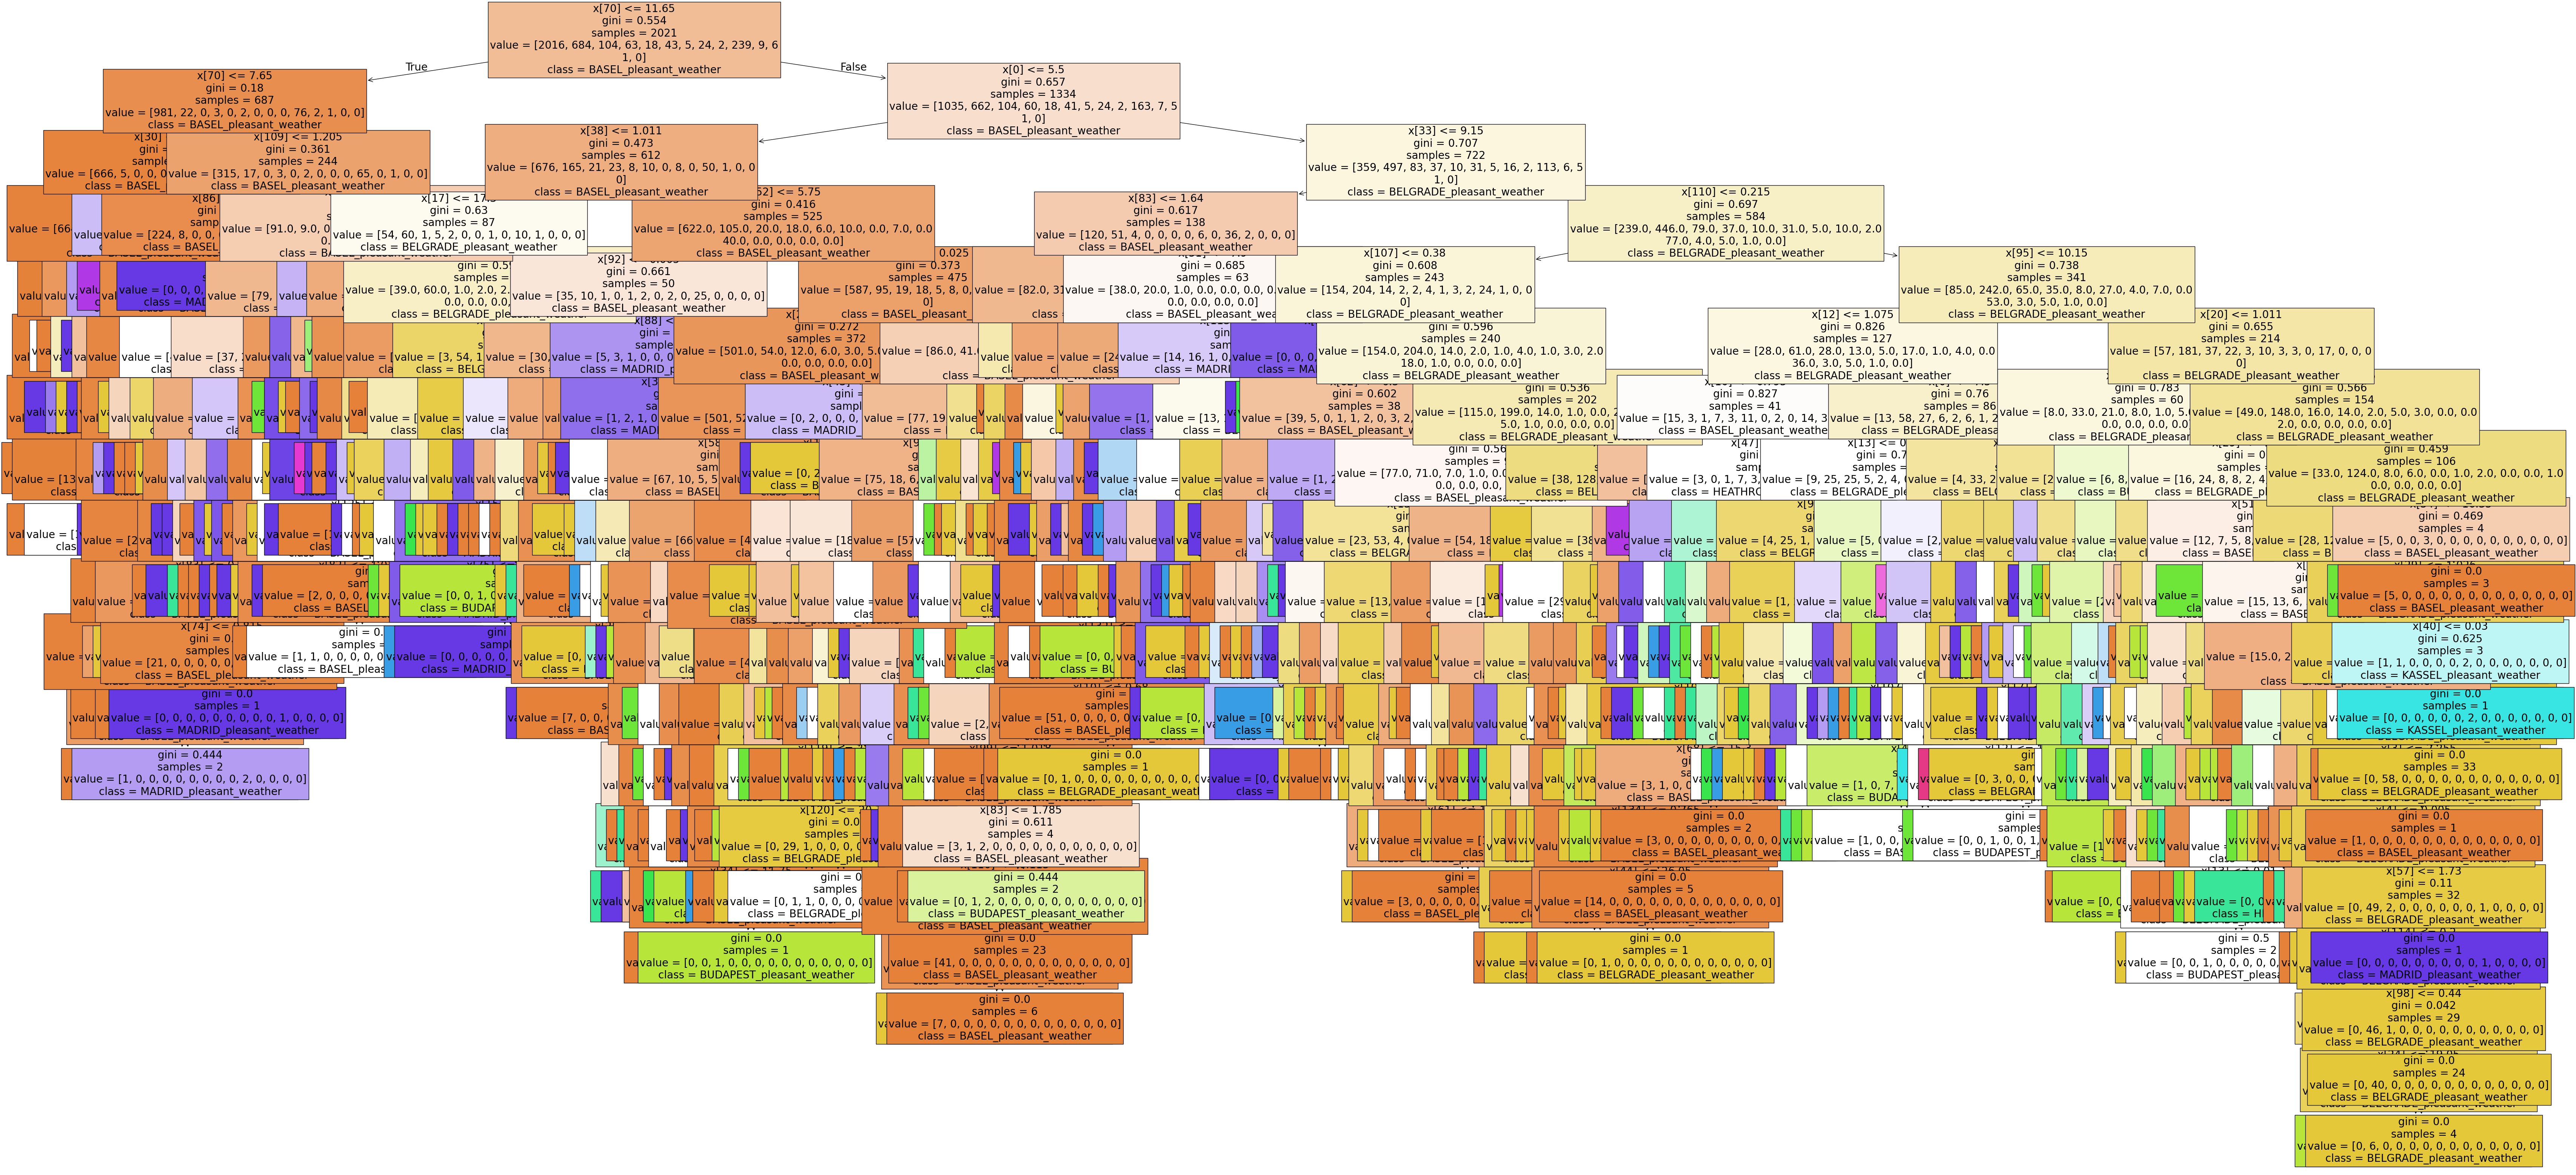

In [70]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=weather_outcomes, filled=True);

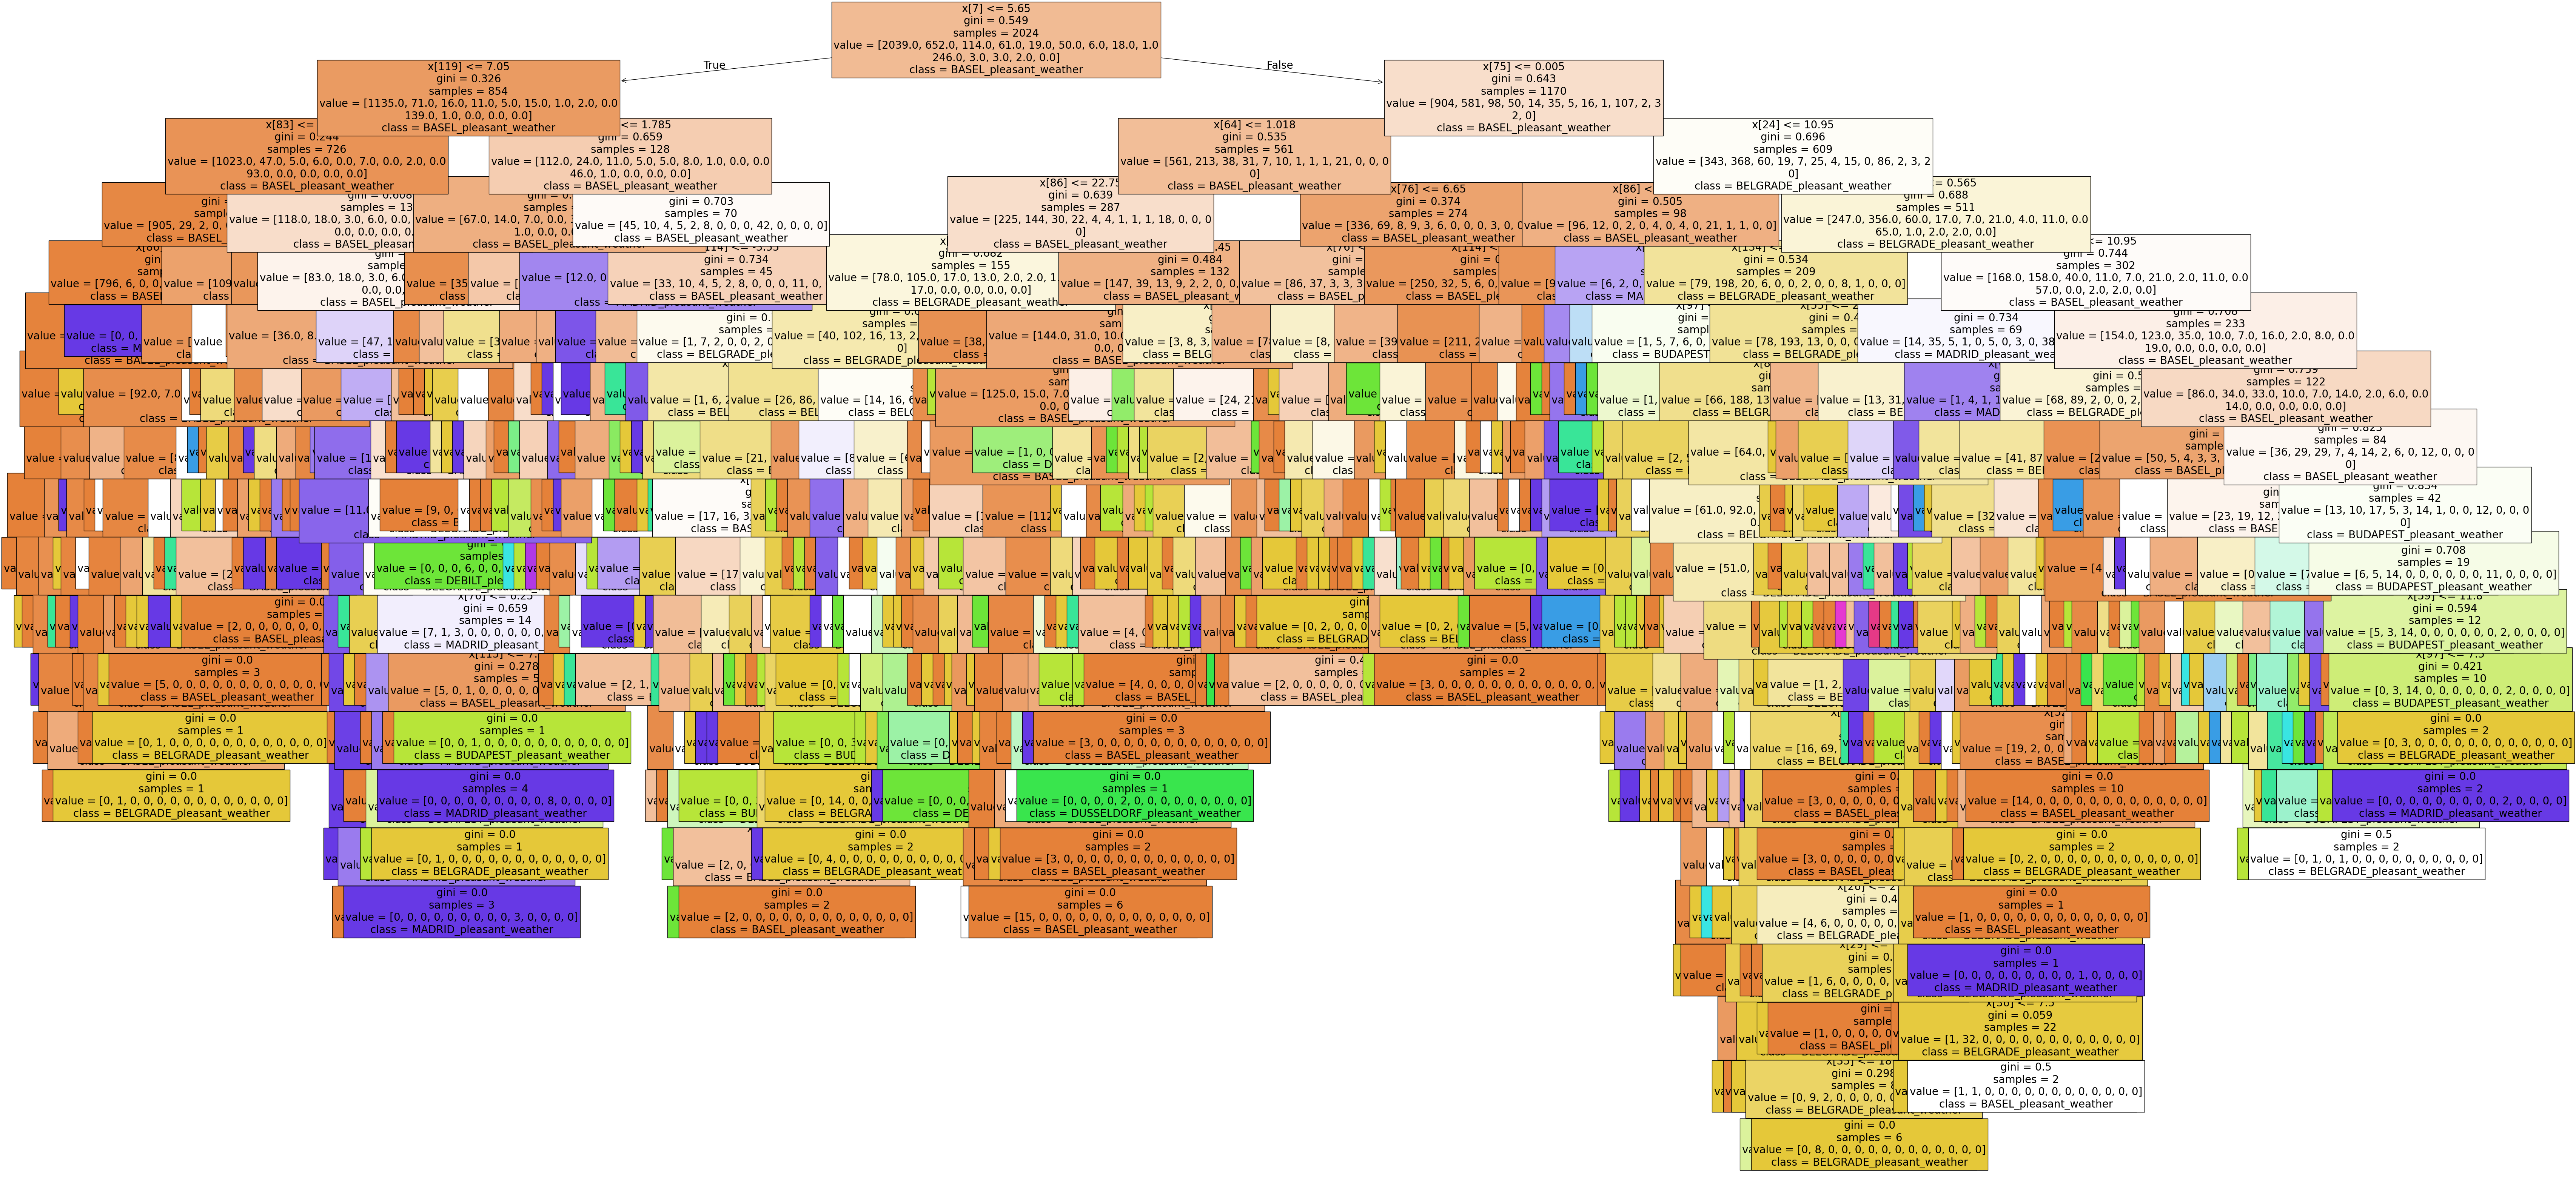

In [71]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[99], fontsize = 20, class_names=weather_outcomes, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 7. Conduct feature importances analysis

In [75]:
#np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01183051, 0.01064146, 0.00646184, 0.01774435, 0.07146526,
       0.02092816, 0.00946632, 0.00616274, 0.01380075, 0.00759167,
       0.01110475, 0.00676191, 0.01290569, 0.0327782 , 0.01211593,
       0.01773658, 0.0121897 , 0.02197529, 0.00408964, 0.00541219,
       0.00544367, 0.0084986 , 0.00603496, 0.0058936 , 0.01826949,
       0.01028031, 0.01362058, 0.00222144, 0.00372389, 0.0071313 ,
       0.00495432, 0.00467877, 0.00373313, 0.00667085, 0.00371902,
       0.00731783, 0.00283812, 0.00384842, 0.00840338, 0.00519088,
       0.00412896, 0.00467563, 0.00673537, 0.0046814 , 0.01058299,
       0.00179712, 0.0040713 , 0.00482918, 0.00565984, 0.00260406,
       0.00337581, 0.00626404, 0.00480182, 0.00799922, 0.00348434,
       0.00800675, 0.00503857, 0.00387938, 0.0035243 , 0.00811409,
       0.00401733, 0.00927416, 0.00254151, 0.00495259, 0.00569763,
       0.00672411, 0.00364387, 0.00455563, 0.01156478, 0.00700553,
       0.01188241, 0.00318453, 0.00382104, 0.00653141, 0.00587

In [77]:
#np.set_printoptions(threshold=1000)

In [78]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.01183051, 0.01064146, 0.00646184, 0.01774435, 0.07146526,
         0.02092816, 0.00946632, 0.00616274, 0.01380075],
        [0.00759167, 0.01110475, 0.00676191, 0.01290569, 0.0327782 ,
         0.01211593, 0.01773658, 0.0121897 , 0.02197529],
        [0.00408964, 0.00541219, 0.00544367, 0.0084986 , 0.00603496,
         0.0058936 , 0.01826949, 0.01028031, 0.01362058],
        [0.00222144, 0.00372389, 0.0071313 , 0.00495432, 0.00467877,
         0.00373313, 0.00667085, 0.00371902, 0.00731783],
        [0.00283812, 0.00384842, 0.00840338, 0.00519088, 0.00412896,
         0.00467563, 0.00673537, 0.0046814 , 0.01058299],
        [0.00179712, 0.0040713 , 0.00482918, 0.00565984, 0.00260406,
         0.00337581, 0.00626404, 0.00480182, 0.00799922],
        [0.00348434, 0.00800675, 0.00503857, 0.00387938, 0.0035243 ,
         0.00811409, 0.00401733, 0.00927416, 0.00254151],
        [0.00495259, 0.00569763, 0.00672411, 0.00364387, 0.00455563,
         0.01156478, 0.00700553, 0.0118824

In [79]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.1685014 , 0.13515971, 0.07754303, 0.04415055, 0.05108514,
       0.04140239, 0.04788043, 0.05921108, 0.04828565, 0.09514756,
       0.0622329 , 0.0366895 , 0.05145534, 0.0400329 , 0.04122241])

In [85]:
important = pd.Series(sumarray, index = weather) #.sort_values(ascending = False)
important

BASEL_         0.168501
BELGRADE_      0.135160
BUDAPEST_      0.077543
DEBILT_        0.044151
DUSSELDORF_    0.051085
HEATHROW_      0.041402
KASSEL_        0.047880
LJUBLJANA_     0.059211
MAASTRICHT_    0.048286
MADRID_        0.095148
MUNCHENB_      0.062233
OSLO_          0.036689
SONNBLICK_     0.051455
STOCKHOLM_     0.040033
VALENTIA_      0.041222
dtype: float64

['BASEL_', 'BELGRADE_', 'BUDAPEST_', 'DEBILT_', 'DUSSELDORF_', 'HEATHROW_', 'KASSEL_', 'LJUBLJANA_', 'MAASTRICHT_', 'MADRID_', 'MUNCHENB_', 'OSLO_', 'SONNBLICK_', 'STOCKHOLM_', 'VALENTIA_']


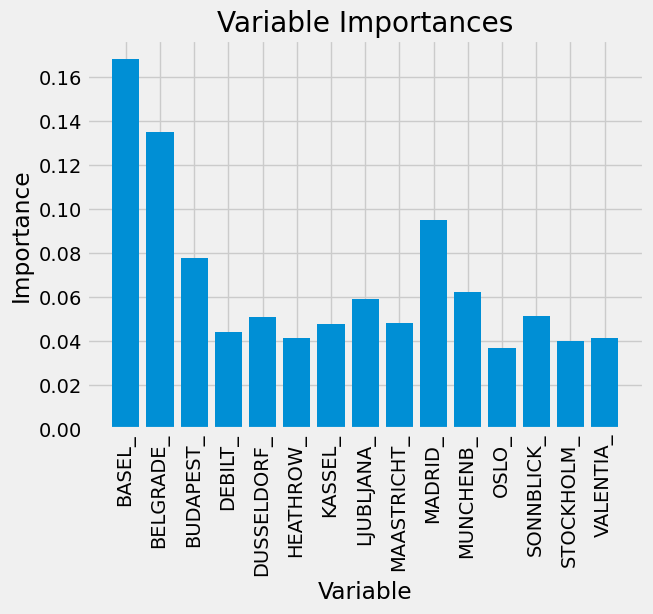

In [87]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

 **Notes:** Basel, Belgrade, and Madrid weather stations still hold the most variable importance (weight) in our random tree prediction model, with an accuracy of 85% rather than 88%.


--------------------------------------------------------------------------------------------------------------------------------------